# Indicators of Heart Disease

## Springboard Capstone Project - Nov 2025
### *by Preethi Swaminathan*

### About the data

According to CDC, Heart Disease (HD) is the leading cause of death for most races in the USA. Several factors can be directly or indirectly linked to heart disease, hence analyzing the key risk factors is pivotal for early intervention. 
The dataset, originally from CDC, was generated in 2022 and is part of the Behavioral Risk Factor Surveillance System (BFRSS). Annual telephone health surveys were conducted to get health data from close to 200,000 U.S. residents in all 50 states, District of Columbia and three U.S territories.

Kaggle source: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease/data
#####  The goal of the project is to examine the clinical, lifestyle and demographic indicators to help CDC identify at least 10 factors that have a correlation with heart disease incidence. 
Some constraints within the solution space are :
 1. Assumption that only a person who had heart attack or angina as having heart disease
 2. Data and findings are region specific as the survey data is from USA. <br>

The insights generated from analyzing this data are mainly for healthcare providers (hospitals, doctors, nurses) who can use the findings to guide patient screening and disgnosis for early intervention.

### Overview of the Analysis

1. Importing libraries used for analysis
2. Importing data <br>
       - Adding a new column 'Heart Disease' to the raw data
3. Getting info about the data
4. Data Cleaning & Transformation <br>
       - Renaming categories in few non-numeric columns to improve readability <br>
       - Categorizing BMI and Sleep health <br>
5. Determining the overall population % with HD
6. Analyzing Numeric parameters <br>
       - Identifying numeric columns <br>
       - Descriptive statistics of numeric parameters <br>
       - Data distribution using Box plots and Histograms <br>
7. Analyzing Categorical parameters <br>
       - Chi square test to determine significant categorical columns <br>
       - Identifying significant factors linked with HD based on a threshold % and plotting them individually <br>
       - Identifying pairs of significant factors linked with HD (slicing) based on a threshold % and plotting them <br>
8. Correlation of factors vs. Heart Disease <br>
       - Converting Categorical data to Numeric data <br>
       - Perform Pearson's correlation on each factor with respect to Heart Disease and find the top 10 highly correlated factors <br>
9. Analytical Results 

### Importing libraries

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math as math
from scipy.stats import chi2_contingency

### Importing data

In [2]:
data_raw = pd.read_csv('C:\\Users\\preet\\OneDrive\\heart_2022_no_nans.csv')

#### *Adding a new column 'HeartDisease'*
If the person had a heart attack or heart angina (a symptom of heart disease), the person is considered to have heart disease. 

In [3]:
#HasHeartDisease - combine 'HadHeartAttack' &'HadAngina'
data_raw['HasHeartDisease'] = ((data_raw['HadHeartAttack'] =='Yes') | (data_raw['HadAngina'] == 'Yes')).map({True:'Yes',False:'No'})

### About the data

In [4]:
# info regarding the data frame
print('Info about the data:\n')
data_raw.info()

# sample data showing first 10 records
print('\n\nData showing first 10 records:\n')
data_raw.head(10)

Info about the data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 41 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkin

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,HasHeartDisease
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes,No
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes,No
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No,No
5,Alabama,Male,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,120.20,34.96,Yes,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No,No
6,Alabama,Female,Good,3.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,"6 or more, but not all",No,...,88.00,33.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No,No
7,Alabama,Male,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,1 to 5,Yes,...,74.84,24.37,No,Yes,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes,Yes
8,Alabama,Male,Good,2.0,0.0,5 or more years ago,No,6.0,None of them,No,...,78.02,26.94,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes,No
9,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,63.50,22.60,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No,No


### Data Cleaning & Transformation

In [5]:
# Copy original data frame to another data frame to perform cleaning, transformation & analysis 
df = data_raw.copy(deep=True)

#### *Renaming categories in non-numeric columns to improve readability*

In [6]:
# Data Transform to shorten and improve readability of column values

#Race
df.loc[df['RaceEthnicityCategory'] == 'White only, Non-Hispanic', 'RaceEthnicityCategory'] = 'White'
df.loc[df['RaceEthnicityCategory'] == 'Black only, Non-Hispanic', 'RaceEthnicityCategory'] = 'Black'
df.loc[df['RaceEthnicityCategory'] == 'Multiracial, Non-Hispanic', 'RaceEthnicityCategory'] = 'Multiracial'
df.loc[df['RaceEthnicityCategory'] == 'Other race only, Non-Hispanic', 'RaceEthnicityCategory'] = 'Other race'

#AgeCategory
df['AgeCategory'] = df['AgeCategory'].map(lambda x: x.lstrip('Age '))
df['AgeCategory'] = df['AgeCategory'].map(lambda x: x.replace(' to ', '-'))
df['AgeCategory'] = df['AgeCategory'].map(lambda x: '>=80' if x == '80 or older' else x)

#SmokerStatus
df.loc[df['SmokerStatus'] == 'Current smoker - now smokes every day', 'SmokerStatus'] = 'Daily smoker'
df.loc[df['SmokerStatus'] == 'Current smoker - now smokes some days', 'SmokerStatus'] = 'Occasional smoker'

#ECigaretteUsage
df.loc[df['ECigaretteUsage'] == 'Use them every day', 'ECigaretteUsage'] = 'Daily smoker'
df.loc[df['ECigaretteUsage'] == 'Use them some days', 'ECigaretteUsage'] = 'Occasional smoker'
df.loc[df['ECigaretteUsage'] == 'Never used e-cigarettes in my entire life', 'ECigaretteUsage'] = 'Never smoked'
df.loc[df['ECigaretteUsage'] == 'Not at all (right now)', 'ECigaretteUsage'] = 'Former smoker'

#HadDiabetes
df.loc[df['HadDiabetes'] == 'No, pre-diabetes or borderline diabetes', 'HadDiabetes'] = 'Pre-diabetic'
df.loc[df['HadDiabetes'] == 'Yes, but only during pregnancy (female)', 'HadDiabetes'] = 'Gestational'

#LastCheckupTime
df.loc[df['LastCheckupTime'] == 'Within past year (anytime less than 12 months ago)', 'LastCheckupTime'] = '< 1 yr'
df.loc[df['LastCheckupTime'] == 'Within past 5 years (2 years but less than 5 years ago)', 'LastCheckupTime'] = '2 - 5 yrs'
df.loc[df['LastCheckupTime'] == 'Within past 2 years (1 year but less than 2 years ago)', 'LastCheckupTime'] = '1 - 2 yrs'
df.loc[df['LastCheckupTime'] == '5 or more years ago', 'LastCheckupTime'] = '> 5 yrs'

#TetanusLast10Tdap
df.loc[df['TetanusLast10Tdap'] == 'Yes, received tetanus shot but not sure what type', 'TetanusLast10Tdap'] = 'Yes, but type unknown'
df.loc[df['TetanusLast10Tdap'] == 'No, did not receive any tetanus shot in the past 10 years', 'TetanusLast10Tdap'] = 'Not in the past 10 yrs'
df.loc[df['TetanusLast10Tdap'] == 'Yes, received tetanus shot, but not Tdap', 'TetanusLast10Tdap'] = 'Yes, but not Tdap'

#RemovedTeeth
df.loc[df['RemovedTeeth'] == 'None of them', 'RemovedTeeth'] = 'None'
df.loc[df['RemovedTeeth'] == '6 or more, but not all', 'RemovedTeeth'] = '> 6 (not all)'

#### *Categorizing BMI and Sleep Health columns*

In [7]:
#BMI Category from 'BMI' numeric data column
df['BMICategory'] = df['BMI'].apply(lambda x: 'Obese' if x >= 30 else ('Overweight' if x >= 25 else('Healthy Weight' if x >= 18.5 else 'Underweight')))

#SleepHealth from 'SleepHours' numeric data column
df['SleepHealth'] = df['SleepHours'].apply(lambda x: 'Lacking' if x < 7 else ('Good' if x < 10 else 'Excess'))

### Percentage of population with Heart Disease

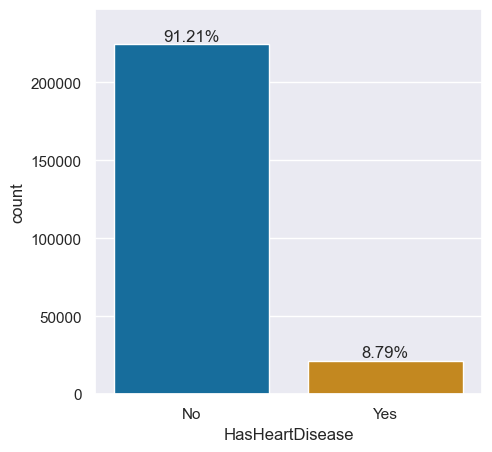

In [8]:
# create plot
sns.set(rc={"figure.figsize":(5, 5)})
ax = sns.countplot(data=df, x='HasHeartDisease', palette='colorblind', hue='HasHeartDisease')

# get the total count of the column values
total = df['HasHeartDisease'].count()

# annotate the bars
for bar in ax.containers:
    ax.bar_label(bar, fmt=lambda x: f'{(x/total)*100:0.2f}%')

# add space at the end of the bar for the labels
ax.margins(y=0.1)

plt.show()

##### Insight: 
Only 8.8% of the survey population has heart disease, indicating an imbalance in the dataset towards patients without heart disease. 

### Analyzing Numeric Parameters
Numeric columns: <br>
PhysicalHealthDays - Number of days in a month suffering from physical health issues <br>
MentalHealthDays - Number of days in a month suffering from mental health issues <br>
SleepHours - Number of hours of sleep per day <br>
HeightInMeters - Height <br>
WeightInKilograms - Weight <br>
BMI

#### *Identifying Numerical Columns*

In [9]:
numeric_params = df.select_dtypes(include=['number']).columns.tolist()

#### *Segregating data based on Heart Disease Condition*

In [10]:
# Two dataframe subsets based on presence or absence of Heart disease
df_withHD = df[df['HasHeartDisease']=='Yes']
df_noHD = df[df['HasHeartDisease']=='No']

#### *Description of Numerical Columns*

In [11]:
# combined data description
df.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000
mean,4.119026,4.167140,7.021331,1.705150,83.615179,28.668136
std,8.405844,8.102687,1.440681,0.106654,21.323156,6.513973
min,0.000000,0.000000,1.000000,0.910000,28.120000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.270000
50%,0.000000,0.000000,7.000000,1.700000,81.650000,27.460000
75%,3.000000,4.000000,8.000000,1.780000,95.250000,31.890000
max,30.000000,30.000000,24.000000,2.410000,292.570000,97.650000


In [12]:
# With HD data description
df_withHD.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,21616.000000,21616.000000,21616.000000,21616.000000,21616.000000,21616.000000
mean,8.578969,4.904839,7.063055,1.712325,87.076783,29.612653
std,11.556219,9.286464,1.775499,0.108060,21.924101,6.707738
min,0.000000,0.000000,1.000000,0.910000,31.750000,12.340000
25%,0.000000,0.000000,6.000000,1.630000,72.570000,25.100000
50%,2.000000,0.000000,7.000000,1.730000,83.910000,28.480000
75%,15.000000,5.000000,8.000000,1.800000,99.790000,32.890000
max,30.000000,30.000000,23.000000,2.410000,263.080000,97.650000


In [13]:
# Without HD data description
df_noHD.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,224406.000000,224406.000000,224406.000000,224406.000000,224406.000000,224406.000000
mean,3.689420,4.096080,7.017312,1.704459,83.281738,28.577155
std,7.905724,7.975813,1.404160,0.106492,21.234648,6.487762
min,0.000000,0.000000,1.000000,0.910000,28.120000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.210000
50%,0.000000,0.000000,7.000000,1.700000,81.650000,27.440000
75%,3.000000,4.000000,8.000000,1.780000,95.250000,31.750000
max,30.000000,30.000000,24.000000,2.410000,292.570000,97.650000


#### *Histogram plots*

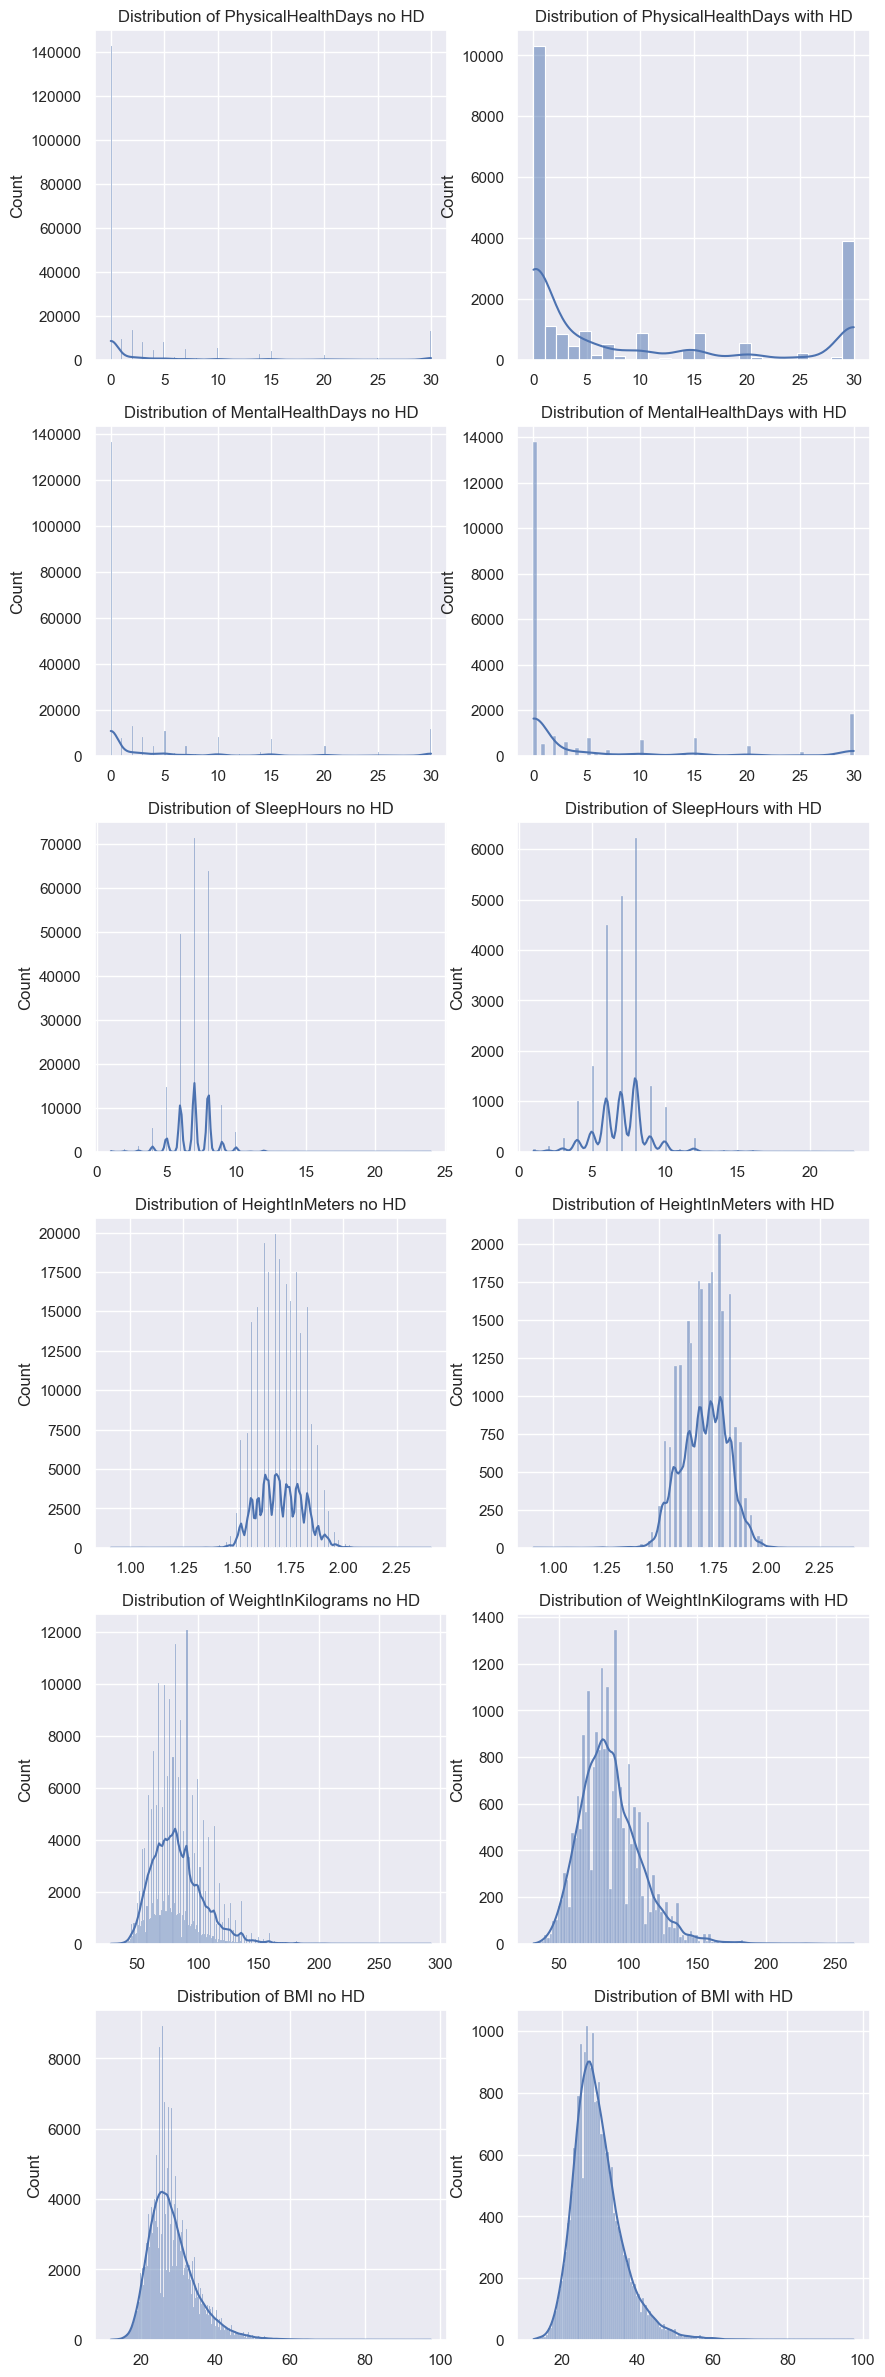

In [32]:
cols = 2
rows = len(numeric_params)

fig, axes =  plt.subplots(rows, cols)

for item in numeric_params:
    index = numeric_params.index(item)
    axis1 = sns.histplot(data=df_noHD, x=item, ax=axes[index][0], kde=True)
    axis2 = sns.histplot(data=df_withHD, x=item, ax=axes[index][1], kde=True)
    #axis = sns.displot(data=df, x=item, col='HasHeartDisease', kind='hist')
    axis1.set(title='Distribution of ' + item + ' no HD', xlabel=None)
    axis2.set(title='Distribution of ' + item + ' with HD', xlabel=None)

plt.rcParams["figure.figsize"] = [10, (5*rows)]
plt.show()

##### Insight: 
The numeric parameters for populations with and without HD follow a similar distribution pattern on the histogram.

#### *Box plots*

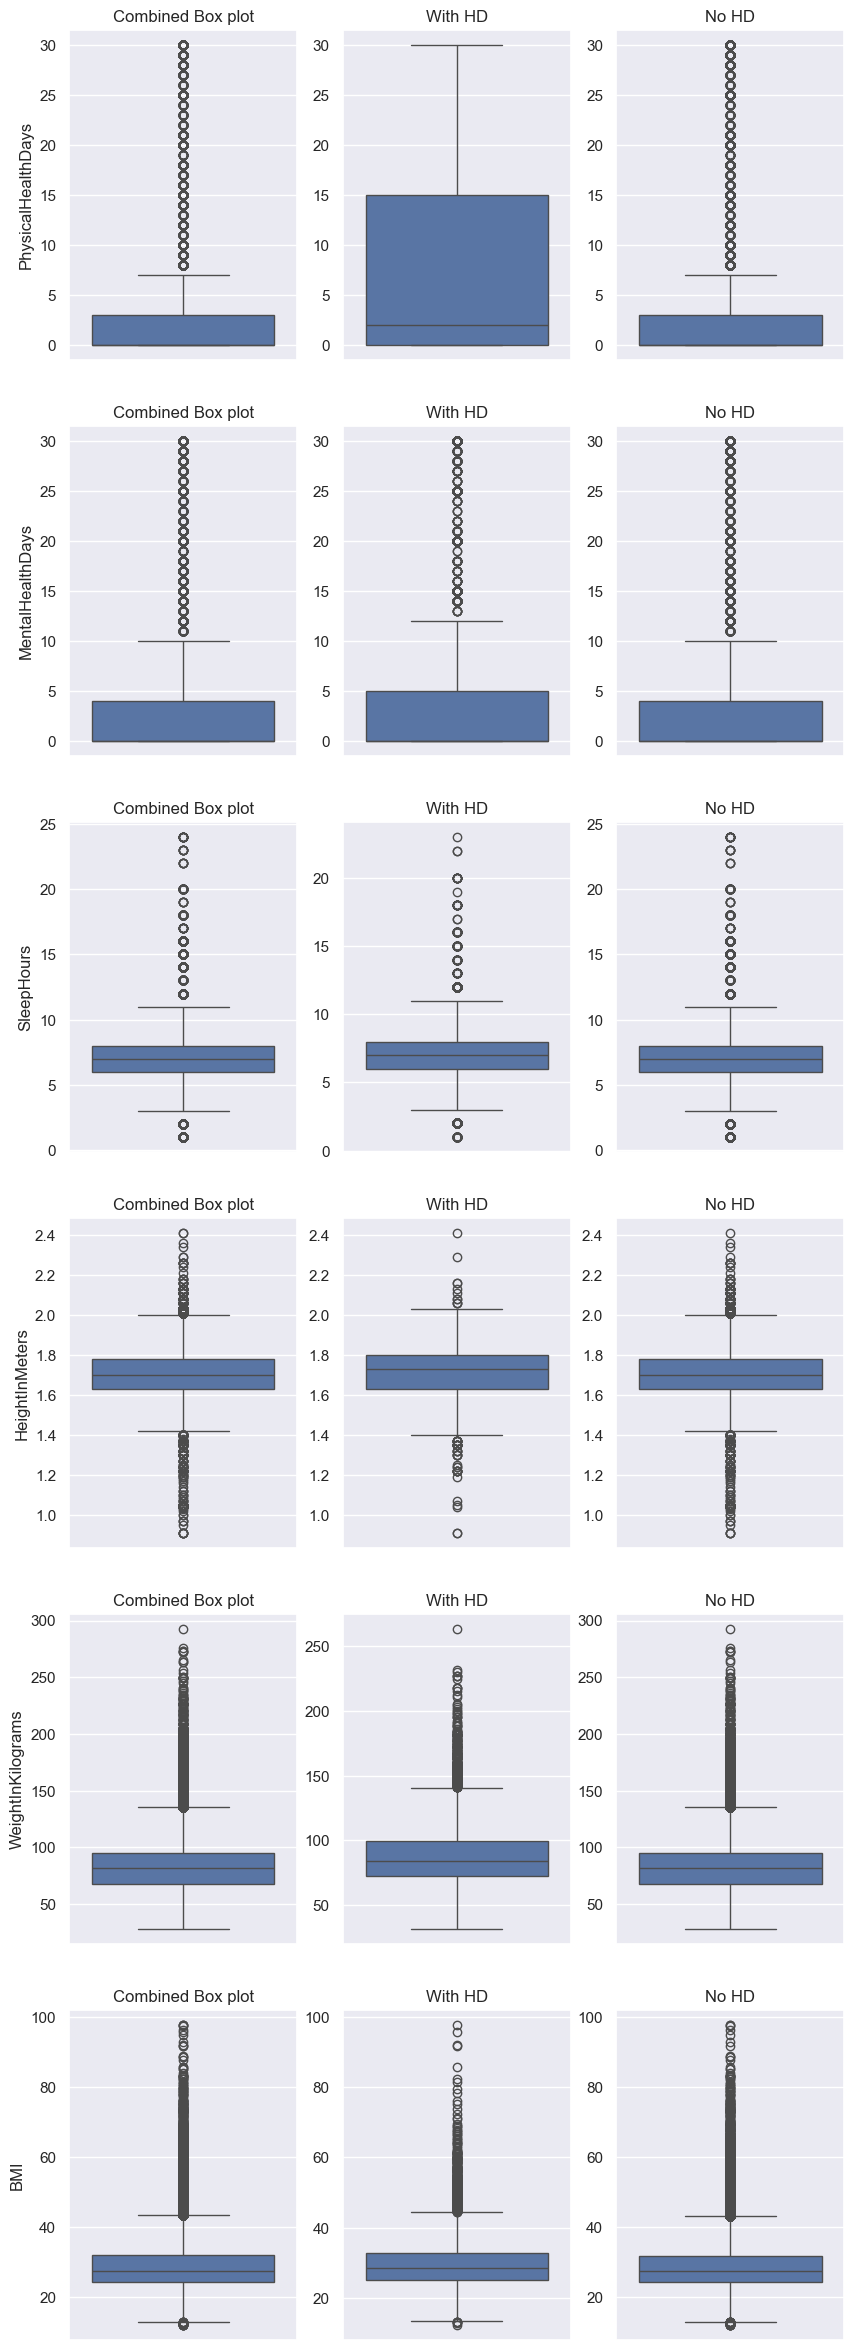

In [15]:
cols = 3
rows = len(numeric_params)

fig, axes =  plt.subplots(rows, cols)

for item in numeric_params:
    index = numeric_params.index(item)
    axis1 = sns.boxplot(data=df, y=item, ax=axes[index][0])
    axis2 = sns.boxplot(data=df_withHD, y=item, ax=axes[index][1])
    axis3 = sns.boxplot(data=df_noHD, y=item, ax=axes[index][2])
    axis1.set(title='Combined Box plot')
    axis2.set(title= 'With HD', ylabel=None)
    axis3.set(title='No HD', ylabel=None)

plt.rcParams["figure.figsize"] = [10, (5*rows)]
plt.show()

##### Insight: 
The box plots are similar for combined, with/without HD data. Several outliers for each parameter. However, they were not removed for analysis.

### Analyzing Categorical Parameters

In [16]:
#print(df.select_dtypes(exclude=['number']).columns.tolist())

# HadHeartDisease and HadAngina are excluded as they are combined into HasHeartDisease column
ListOfCategoricalFactors = [
 #'State',
 'Sex',
 'GeneralHealth',
 'LastCheckupTime',
 'PhysicalActivities',
 'RemovedTeeth',
 #'HadHeartAttack', 
 #'HadAngina',
 'HadStroke',
 'HadAsthma',
 'HadSkinCancer',
 'HadCOPD',
 'HadDepressiveDisorder',
 'HadKidneyDisease',
 'HadArthritis',
 'HadDiabetes',
 'DeafOrHardOfHearing',
 'BlindOrVisionDifficulty',
 'DifficultyConcentrating',
 'DifficultyWalking',
 'DifficultyDressingBathing',
 'DifficultyErrands',
 'SmokerStatus',
 'ECigaretteUsage',
 'ChestScan',
 'RaceEthnicityCategory',
 'AgeCategory',
 'AlcoholDrinkers',
 'HIVTesting',
 'FluVaxLast12',
 'PneumoVaxEver',
 'TetanusLast10Tdap',
 'HighRiskLastYear',
 'CovidPos',
 'BMICategory',
 'SleepHealth'
]

#### *Chi-Square Test*

In [27]:
ListOfStatisticalSignificantFactors = []

# significant factor used for chi-square test
alpha = 0.05
    
# loop through the categorical variables
for factor in ListOfCategoricalFactors:
    # create contingency table for the factor vs HasHeartDisease
    contingency_table = pd.crosstab(df['HasHeartDisease'], df[factor])

    # perform chi-sqaure test and get the results
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    #print(factor, p_value)

    # check if any of the expected values are <= 5
    # if so, the test cannot be trusted and so the factor would be considered insignificant
    canTrust = True
    for values in expected:
        for value in values:
            if value <= 5:
                canTrust = False

    # if the test can be trusted and 
    # if the p value is less than significant factor, 
    # then there is a relation between the factor and HasHeartDisease  
    if canTrust == True and p_value <= alpha:
        ListOfStatisticalSignificantFactors.append(factor)

print('List of factors that has significant relationship with HasHeartDisease:\n')
print(ListOfStatisticalSignificantFactors)

List of factors that has significant relationship with HasHeartDisease:

['Sex', 'GeneralHealth', 'LastCheckupTime', 'PhysicalActivities', 'RemovedTeeth', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos', 'BMICategory', 'SleepHealth']


##### Insight:
The null hypothesis is that all variables are independant of heart disease. Since the p-values from chi-square test for all variables are less than the significant factor (0.05), the null is rejected. All 33 factors that were considered for the chi-square test seem to have a relationship with heart disease. However, this test does not reveal the significance of the relationship. For instance, HIV Testing is revealed to have a relation with heart disease according to this test, but it is not reasonable to conclude HIV testing increases heart disease risk. 

#### *Identifying significant factors related to Heart Disease (based on a threshold percentage)*

In [18]:
# Defining a method to find percentage of population with heart disease in each unique category from the column(s)

def heartDiseaseStatsForColumns(df, columns):
    # Find unique categories from the column(s) of interest + HasHeartDisease column (Yes/No column)
    unique_categories = df.groupby(columns + ['HasHeartDisease']).size().reset_index(name='Count') 
    
    # Calculate the total count for column(s) of interest
    unique_categories['TotalCounts'] = unique_categories.groupby(columns)['Count'].transform('sum')
    
    # Calculate the percentage = count/total count
    unique_categories['Percentage'] = (unique_categories['Count'] / unique_categories['TotalCounts']) * 100
    
    return unique_categories[unique_categories['HasHeartDisease']=='Yes'].sort_values('Percentage',ascending=False)
    

In [19]:
# Find list of significant variables based on HD percentage above a set threshold
ListOfSignificantFactors = []
threshold = 15

# Loop through all available categorical variables
for factor in ListOfStatisticalSignificantFactors:
    # get the percentage for all categories in the factor
    hdStats = heartDiseaseStatsForColumns(df, [factor])

    # if percentage of HD for any of the category exceeds the threshold, add it to significant variable list
    if (hdStats['Percentage'] > threshold).any():
        ListOfSignificantFactors.append(factor)

ListOfSignificantFactors

['GeneralHealth',
 'RemovedTeeth',
 'HadStroke',
 'HadSkinCancer',
 'HadCOPD',
 'HadKidneyDisease',
 'HadArthritis',
 'HadDiabetes',
 'DeafOrHardOfHearing',
 'BlindOrVisionDifficulty',
 'DifficultyWalking',
 'DifficultyDressingBathing',
 'DifficultyErrands',
 'ChestScan',
 'AgeCategory',
 'SleepHealth']

##### Insight:
Setting a threshold of 15% HD returned 16 'Significant factors' out of the 33 factors considered from Chi square test results

#### *Plotting the significant factors (individually)*

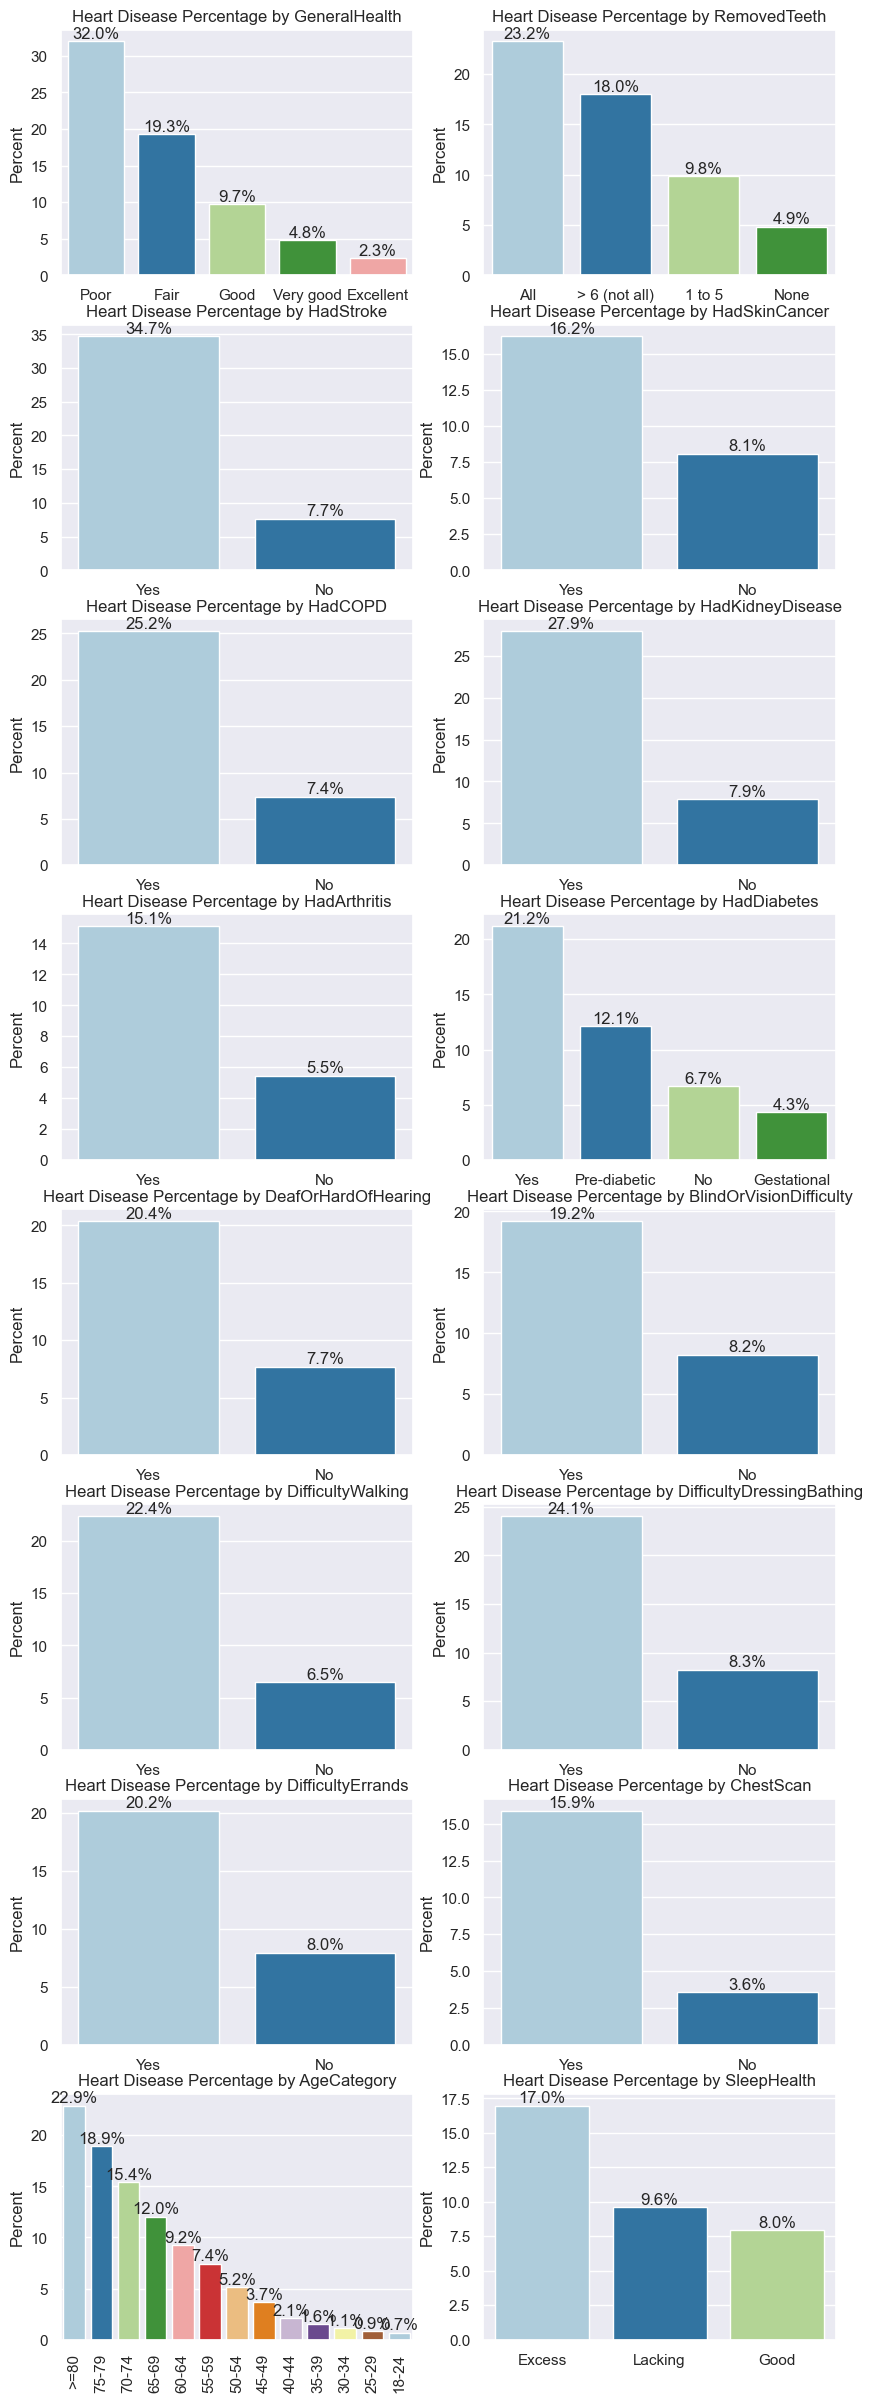

In [20]:
# define number of columns and rows
cols = 2
rows = math.ceil(len(ListOfSignificantFactors)/cols)

# create subplots
fig, axes =  plt.subplots(rows, cols)

# convert 2-d axes object to 1-d array 
axes = np.ravel(axes)

# loop through each significant factor
for factor in ListOfSignificantFactors:
    # get the percentage for each category in the factor
    hdStats = heartDiseaseStatsForColumns(df, [factor])

    # find the index of factor name in the significant facors list
    index = ListOfSignificantFactors.index(factor)

    # plot the factor values with percentages
    axis = sns.barplot(x=factor, y='Percentage', hue=factor, data=hdStats, legend=False, ax=axes[index], palette="Paired")
    
    # set plot title and labels
    axis.set(xlabel=None, ylabel='Percent', title='Heart Disease Percentage by ' + factor)
    
    # rotate the axis labels for factors with more than 5 categories (AgeCategory)
    if hdStats[factor].nunique() > 5:
        axis.tick_params(axis='x', labelrotation=90)

    # display the percentage on top of the bars
    for bar in axis.containers:
        axis.bar_label(bar, fmt='%.1f%%')

# delete any unused subplots 
for i in range(len(ListOfSignificantFactors), len(axes)):
    fig.delaxes(axes[i])

# set plot size. width = 15, height = 5 per row
plt.rcParams["figure.figsize"] = [15, (5*rows)]
plt.show()

##### Insight:
The graphs suggest that, of the overall population with HD, people who have suffered a stroke have the highest HD% (34.7%) closely followed by people with 'Poor' health conditions (32%). Other key risk factors are having Kidney Disease (27.9 %) and Chronic Obstructive Pulmonary Disease (25.2 %).

#### *Slicing all categorical factors to find pairs of significant factors*

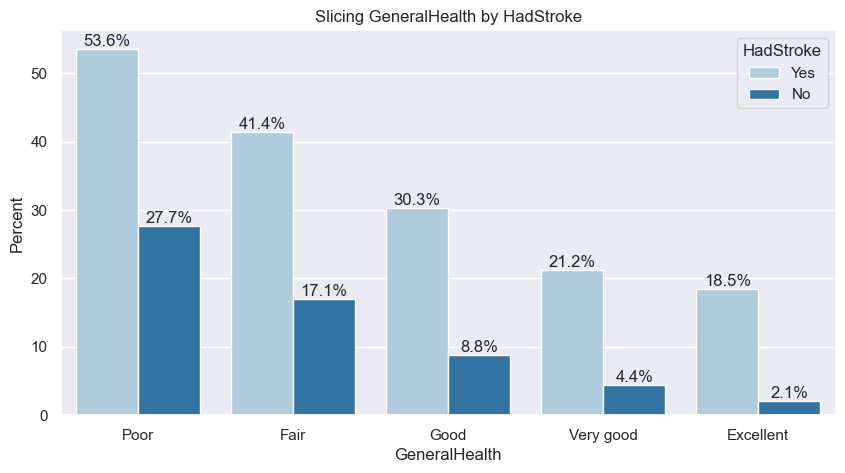

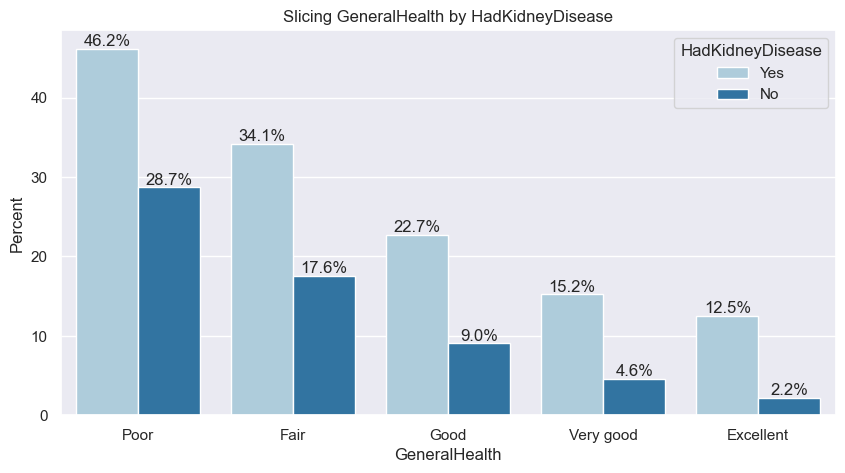

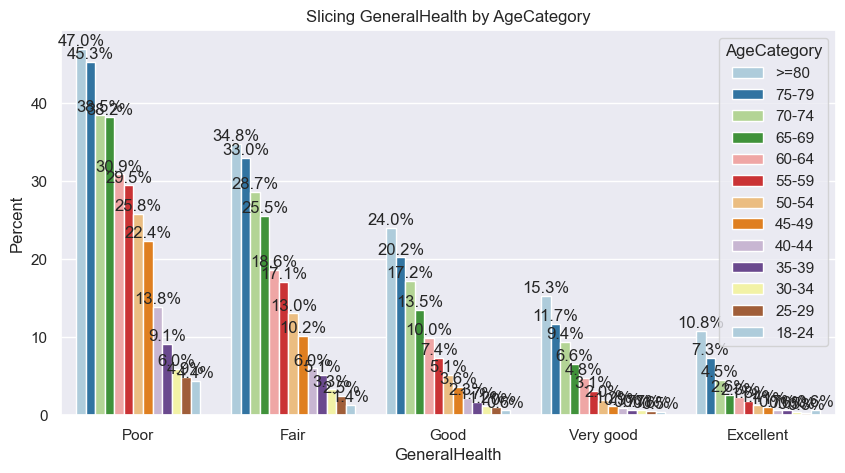

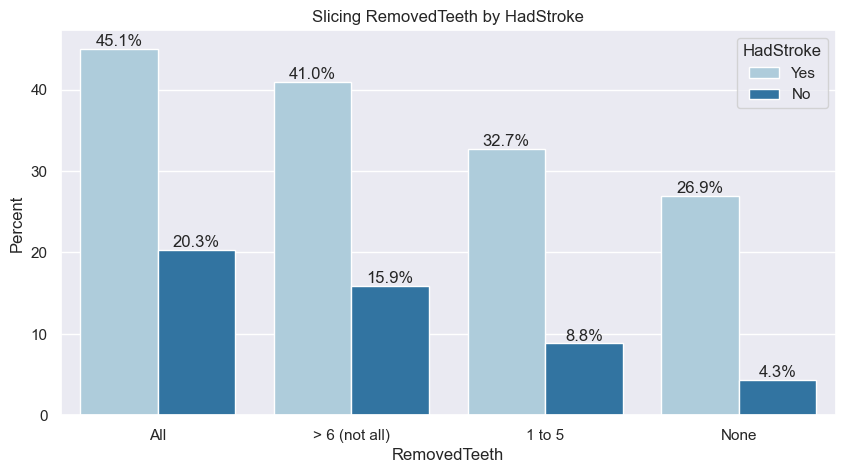

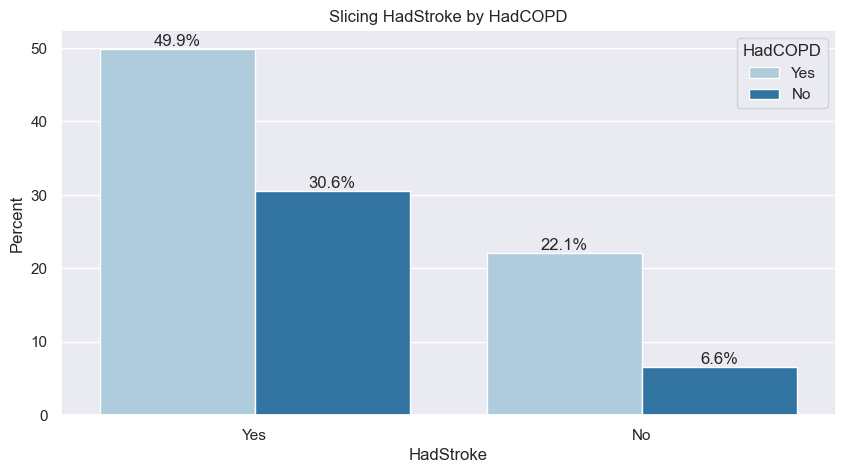

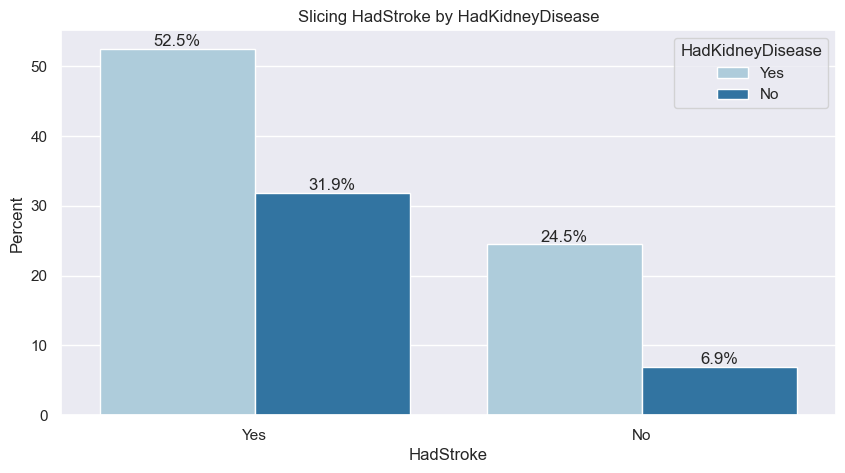

[('GeneralHealth', 'HadStroke'),
 ('GeneralHealth', 'HadKidneyDisease'),
 ('GeneralHealth', 'AgeCategory'),
 ('RemovedTeeth', 'HadStroke'),
 ('HadStroke', 'HadCOPD'),
 ('HadStroke', 'HadKidneyDisease')]

In [21]:
# threshold for finding significant pair of factors
slicingThreshold = 45

ListOfSignificantPairs = []

# loop through each significant factor
for index1 in range(len(ListOfCategoricalFactors)):
    # loop through each significant factor
    for index2 in range(index1+1, len(ListOfCategoricalFactors)):
        #get column 1 value from list
        col1 = ListOfCategoricalFactors[index1]
        #get column 2 value from list
        col2 = ListOfCategoricalFactors[index2]
        
        # get the percentage for each category in the columns 
        hdStats = heartDiseaseStatsForColumns(df, [col1, col2])

        # if percentage for any of the categories is greater than the threshold, add it to the list of significant pairs
        if (hdStats['Percentage'] > slicingThreshold).any():
            ListOfSignificantPairs.append((col1,col2))

            # plot the pair of columns
            sns.set(rc={"figure.figsize":(10, 5)})
            axis = sns.barplot(x=col1, y='Percentage', hue=col2, data=hdStats, palette="Paired")
            axis.set(ylabel='Percent', title=f'Slicing {col1} by {col2}')

            # display the percentage on top of the bars
            for bar in axis.containers:
                axis.bar_label(bar, fmt='%.1f%%')
            plt.show()

ListOfSignificantPairs

##### Insight:
Slicing pairs of factors related to HD (based on 45% threshold) reveals that people with poor health and who have suffered stroke have the highest HD% (53.6%). 
Notable significant pairs of factors are : 
1. 'GeneralHealth' & 'HadStroke'
2. 'GeneralHealth' & 'HadKidneyDisease'
3. 'GeneralHealth' & 'AgeCategory'
4. 'RemovedTeeth' & 'HadStroke'
5. 'HadStroke' & 'HadCOPD'
6. 'HadStroke' & 'HadKidneyDisease'

#### *Slicing factors of interest*

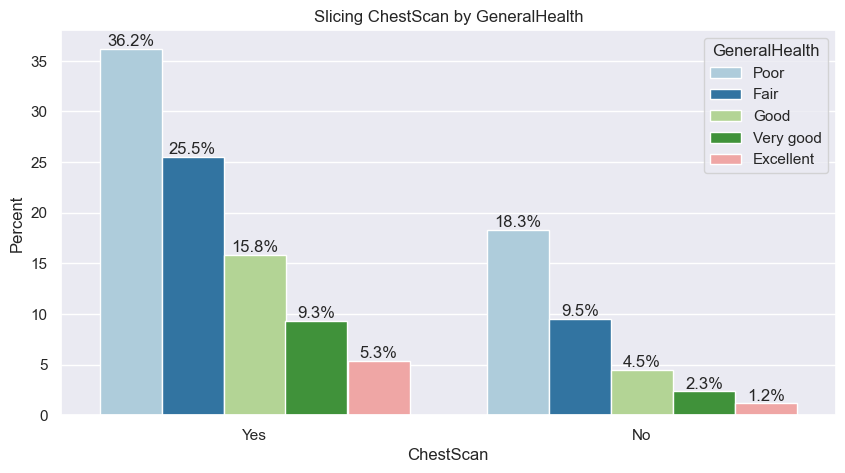

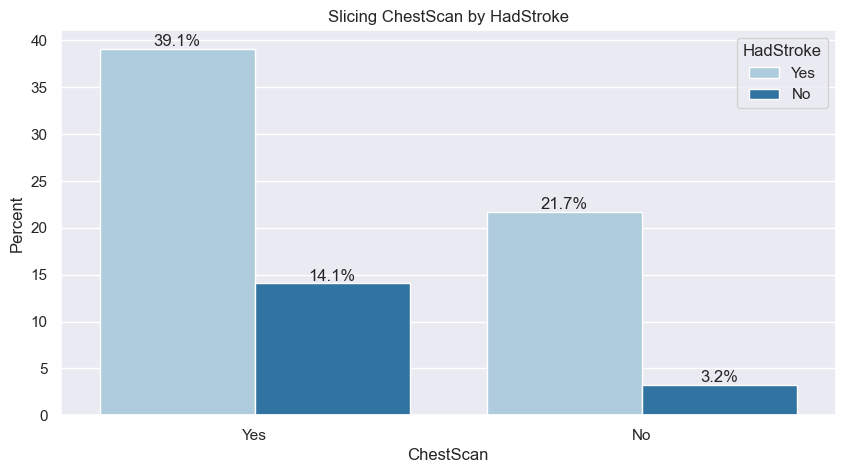

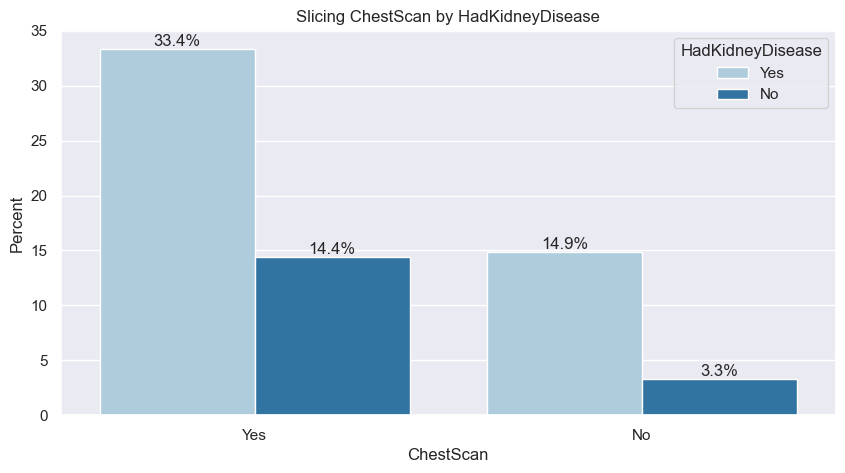

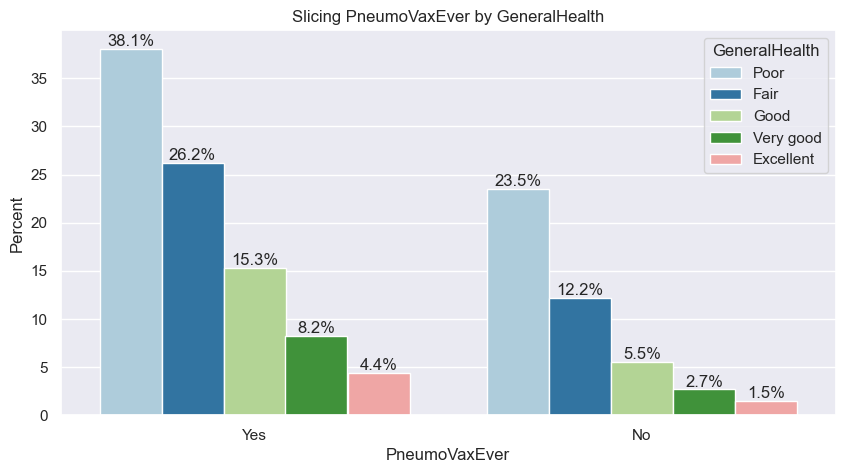

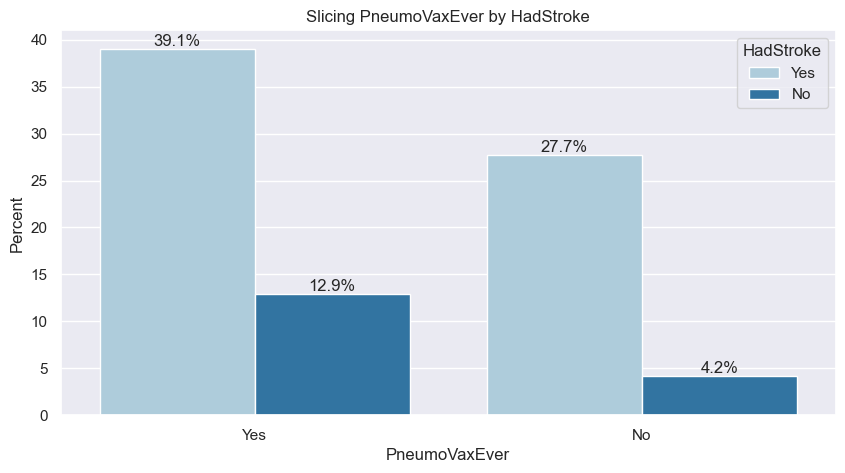

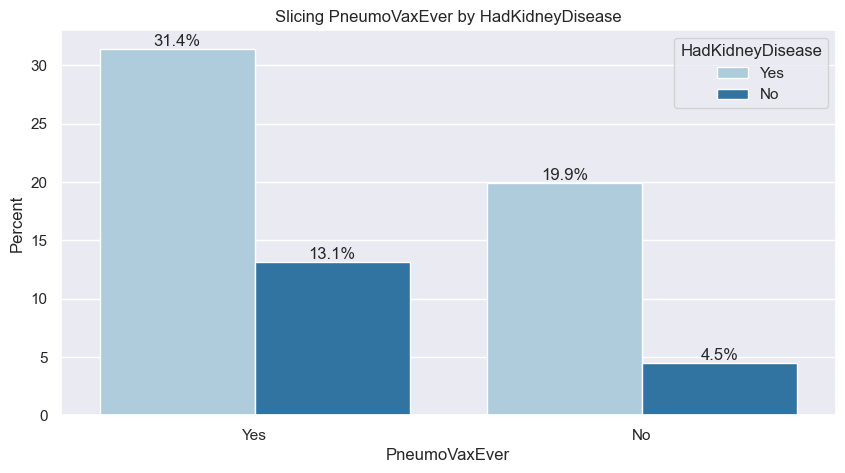

[('ChestScan', 'GeneralHealth'),
 ('ChestScan', 'HadStroke'),
 ('ChestScan', 'HadKidneyDisease'),
 ('PneumoVaxEver', 'GeneralHealth'),
 ('PneumoVaxEver', 'HadStroke'),
 ('PneumoVaxEver', 'HadKidneyDisease')]

In [22]:
# threshold for finding significant pair of factors
slicingThreshold = 30

ListOfInterestingPairs = []

ListOfInterestingFactors = ['ChestScan', 'PneumoVaxEver']
# loop through each significant factor
for col1 in ListOfInterestingFactors:
    # loop through each significant factor
    for col2 in ListOfCategoricalFactors:
        # if both columns are same, no need to slice it, continue to next iteration
        if col1 == col2: 
            continue
        # if a pair is already in the list of significant pairs, continue to next iteration
        if((col1,col2) in ListOfInterestingPairs or (col2, col1) in ListOfInterestingPairs):
            continue

        # get the percentage for each category in the columns 
        hdStats = heartDiseaseStatsForColumns(df, [col1, col2])

        # if percentage for any of the categories is greater than the threshold, add it to the list of significant pairs
        if (hdStats['Percentage'] > slicingThreshold).any():
            ListOfInterestingPairs.append((col1,col2))

            # plot the pair of columns
            sns.set(rc={"figure.figsize":(10, 5)})
            axis = sns.barplot(x=col1, y='Percentage', hue=col2, data=hdStats, palette="Paired")
            axis.set(ylabel='Percent', title=f'Slicing {col1} by {col2}')

            # display the percentage on top of the bars
            for bar in axis.containers:
                axis.bar_label(bar, fmt='%.1f%%')
            plt.show()

ListOfInterestingPairs

##### Insight:
This method is for slicing any two specific factors of interest with the other remaining factors and determining heart disease percentage (based on 30% threshold for heart disease).

Due to the high correlation coefficient values for 'ChestScan' and 'PneumoVaxEver' (based on correlation calculation performed below), slicing each of them with the other factors reveal the following pairs to have over 30% HD%

1. ChestScan & GeneralHealth
2. ChestScan & HadStroke
3. ChestScan & HadKidneyDisease
4. PneumoVaxEver & GeneralHealth
5. PneumoVaxEver & HadStroke
6. PneumoVaxEver & HadKidneyDisease

### Correlation of factors vs. Heart Disease

#### *Converting Categorical data to Numeric data*

In [23]:
# Copy the raw data frame to another data frame where all column values will be transformed to be numeric
df_num = data_raw.copy(deep=True)

# Drop HadAngina and HadHeartAttack columns
df_num = df_num.drop('HadAngina', axis=1)
df_num = df_num.drop('HadHeartAttack', axis=1)

In [24]:
# find all non-numeric columns in the data frame
non_numerical_columns = df_num.select_dtypes(exclude=['number']).columns.tolist()
#print(non_numerical_columns)

# convert each non-numeric column into a numeric column by mapping numeric values to categories
for column in non_numerical_columns:
    df_num[column] = df_num[column].astype('category').cat.codes

#### *Perform Correlation and find highly correlated factors*

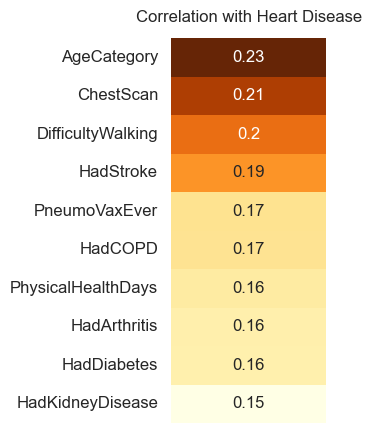

In [30]:
# find correlation of every column with HasHeartDisease and sorting based on correlation coefficient - absolute value
correlations = df_num.corrwith(df_num['HasHeartDisease']).sort_values(key=abs, ascending=False)

# filter top 10 correlations 
top_correlations = correlations.drop('HasHeartDisease').head(10).to_frame(name='Correlation with Heart Disease')

sns.set(rc={"figure.figsize":(2,5)})
sns.heatmap(top_correlations, annot=True, cbar=False, cmap='YlOrBr')
plt.tick_params(axis='both', which='major', labelsize=12, labelbottom=False, bottom=False, top = False, labeltop=True)
plt.show()

ListOfCorrelatedFactors = top_correlations.index.to_list()

##### Insight:
Computing correlation function of all factors against HasHeartDisease reveals the top factors that contribute to heart disease with Age Factor having the most correlation. 

### Analytical Results 

In [26]:
print('Highly recommend heart health check-up for any of the following:\n')   

threshold = 14.5

# Loop through all available correlated factors
for factor in ListOfCorrelatedFactors:
    # get the percentage for all categories in the factor
    hdStats = heartDiseaseStatsForColumns(data_raw, [factor])
    # print(hdStats)
    # if percentage of HD for any of the category exceeds the threshold
    if (hdStats['Percentage'] > threshold).any():
        # extract the records matching the threshold
        df_selected = hdStats[hdStats['Percentage'] > threshold].sort_values(by=factor)
        # print(df_selected)

        # display the values for the factor to be cautious about
        print(f"\nIf the person's response to the question '{factor}' is")
        for category in df_selected[factor]:
            print(f'\t{category}')

Highly recommend heart health check-up for any of the following:


If the person's response to the question 'AgeCategory' is
	Age 70 to 74
	Age 75 to 79
	Age 80 or older

If the person's response to the question 'ChestScan' is
	Yes

If the person's response to the question 'DifficultyWalking' is
	Yes

If the person's response to the question 'HadStroke' is
	Yes

If the person's response to the question 'PneumoVaxEver' is
	Yes

If the person's response to the question 'HadCOPD' is
	Yes

If the person's response to the question 'PhysicalHealthDays' is
	13.0
	15.0
	16.0
	17.0
	18.0
	20.0
	21.0
	22.0
	23.0
	24.0
	25.0
	26.0
	27.0
	28.0
	29.0
	30.0

If the person's response to the question 'HadArthritis' is
	Yes

If the person's response to the question 'HadDiabetes' is
	Yes

If the person's response to the question 'HadKidneyDisease' is
	Yes
